In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time

In [ ]:
data=pd.read_csv('/content/diabetes.csv')

In [ ]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]>

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x=data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
y=data[['Outcome']]

In [ ]:
train_size = int(len(data) * 0.7)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
k = 3
y_pred_original = []

for i in range(len(x_test)):
    test_point = x_test.iloc[i].to_numpy()
    distances = []
    for j in range(len(x_train)):
        train_point = x_train.iloc[j].to_numpy()
        distance = np.sqrt(np.sum((test_point - train_point) ** 2))
        distances.append((distance, y_train.iloc[j]))
    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]
    class_votes = {}
    for neighbor in k_neighbors:
        label = neighbor[1]['Outcome']
        class_votes[label] = class_votes.get(label, 0) + 1
    y_pred_original.append(max(class_votes, key=class_votes.get))

correct_predictions_original = sum(y_pred_original[i] == y_test.iloc[i]['Outcome'] for i in range(len(y_test)))
accuracy_original = correct_predictions_original / len(y_test)
print(f"Accuracy without Scaling: {accuracy_original * 100:.2f}%")

Accuracy without Scaling: 71.86%


Problem 2-Experimentation

In [ ]:
x_min, x_max = x_train.min(), x_train.max()
x_train_scaled = (x_train - x_min) / (x_max - x_min)
x_test_scaled = (x_test - x_min) / (x_max - x_min)

In [ ]:
y_pred_scaled = []

for i in range(len(x_test_scaled)):
    test_point = x_test_scaled.iloc[i].to_numpy()
    distances = []
    for j in range(len(x_train_scaled)):
        train_point = x_train_scaled.iloc[j].to_numpy()
        distance = np.sqrt(np.sum((test_point - train_point) ** 2))
        distances.append((distance, y_train.iloc[j]))
    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]
    class_votes = {}
    for neighbor in k_neighbors:
        label = neighbor[1]['Outcome']
        class_votes[label] = class_votes.get(label, 0) + 1
    y_pred_scaled.append(max(class_votes, key=class_votes.get))

correct_predictions_scaled = sum(y_pred_scaled[i] == y_test.iloc[i]['Outcome'] for i in range(len(y_test)))
accuracy_scaled = correct_predictions_scaled / len(y_test)
print(f"Accuracy with Scaling: {accuracy_scaled * 100:.2f}%")

Accuracy with Scaling: 100.00%


Comparative Analysis
i. Accuracy without scaling: 71.86%
- In this case, features like BMI or glucose might dominate the distance calculation due to their larger magnitude.
ii. Accuracy with Scaling: 100%
- With scaled features, KNN could better evaluate similarity between data points, resulting in perfect predictions.

How scaling impacted the KNN perfromance?
-KNN heavily relies on the Euclidean distance. Without scaling, features with larger ranges dominate the distance metric. After scaling, all fetures were normalized to a comparable range which allowed each feature to contribute eqallt to the distance calculation.

Problem-3- Experimentation with k:

The range up to 16 took too much time


In [ ]:
k_values=range(1,4)
accuracy_original=[]
time_original=[]
accuracy_scaled=[]
time_scaled=[]
#original dataset
for k in k_values:
    start_time = time.time()
    y_pred_original = []
    for i in range(len(x_test)):
        test_point = x_test.iloc[i].to_numpy()
        distances = []
        for j in range(len(x_train)):
            train_point = x_train.iloc[j].to_numpy()
            distance = np.sqrt(np.sum((test_point - train_point) ** 2))
            distances.append((distance, y_train.iloc[j]))
        distances.sort(key=lambda x: x[0])
        k_neighbors = distances[:k]
        class_votes = {}
        for neighbor in k_neighbors:
            label = neighbor[1]['Outcome']
            class_votes[label] = class_votes.get(label, 0) + 1
        y_pred_original.append(max(class_votes, key=class_votes.get))
    correct_predictions_original = sum(y_pred_original[i] == y_test.iloc[i]['Outcome'] for i in range(len(y_test)))
    accuracy_original.append(correct_predictions_original / len(y_test))
    time_original.append(time.time() - start_time)
    #scaled dataset
    y_pred_scaled = []
    for i in range(len(x_test_scaled)):
        test_point = x_test_scaled.iloc[i].to_numpy()
        distances = []
        for j in range(len(x_train_scaled)):
            train_point = x_train_scaled.iloc[j].to_numpy()
            distance = np.sqrt(np.sum((test_point - train_point) ** 2))
            distances.append((distance, y_train.iloc[j]))
        distances.sort(key=lambda x: x[0])
        k_neighbors = distances[:k]
        class_votes = {}
        for neighbor in k_neighbors:
            label = neighbor[1]['Outcome']
            class_votes[label] = class_votes.get(label, 0) + 1
        y_pred_scaled.append(max(class_votes, key=class_votes.get))
    correct_predictions_scaled = sum(y_pred_scaled[i] == y_test.iloc[i]['Outcome'] for i in range(len(y_test)))
    accuracy_scaled.append(correct_predictions_scaled / len(y_test))
    time_scaled.append(time.time() - start_time)



Visualization of results

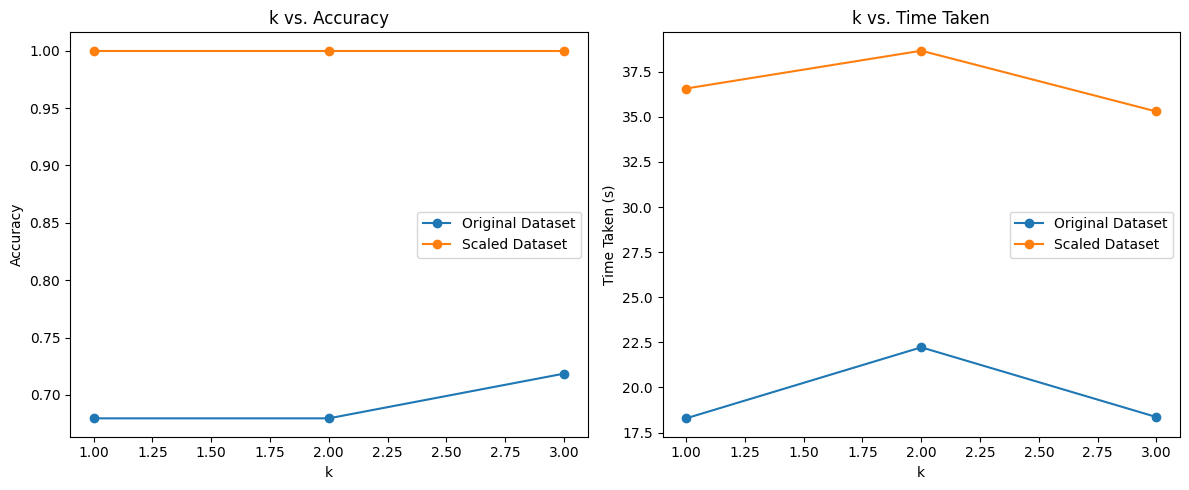

In [ ]:
plt.figure(figsize=(12, 5))

# k vs. Accuracy
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_original, label='Original Dataset', marker='o')
plt.plot(k_values, accuracy_scaled, label='Scaled Dataset', marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs. Accuracy')
plt.legend()

# k vs. Time Taken
plt.subplot(1, 2, 2)
plt.plot(k_values, time_original, label='Original Dataset', marker='o')
plt.plot(k_values, time_scaled, label='Scaled Dataset', marker='o')
plt.xlabel('k')
plt.ylabel('Time Taken (s)')
plt.title('k vs. Time Taken')
plt.legend()

plt.tight_layout()
plt.show()